In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk
import csv
#nltk.download('wordnet')
#nltk.download('omw-1.4') #Open Multingual wordnet
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
#!pip install wordcloud 
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import openpyxl 
import requests
import urllib.request
import io
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
if __name__=="__main__":
    scores = []
    path = "C:/Users/ASU/Desktop/testmining/newproject/train.csv"
    # To open the workbook 
    # workbook object is created
    train = pd.read_csv(path)
    train
    

In [3]:
train

article  \
0      (CNN)The Palestinian Authority officially beca...   
1      (CNN)Never mind cats having nine lives. A stra...   
2      (CNN)If you've been following the news lately,...   
3      (CNN)Five Americans who were monitored for thr...   
4      (CNN)A Duke student has admitted to hanging a ...   
...                                                  ...   
11485  Telecom watchdogs are to stop a rip-off that a...   
11486  The chilling reenactment of how executions are...   
11487  It is a week which has seen him in deep water ...   
11488  Despite the hype surrounding its first watch, ...   
11489  Angus Hawley's brother has spoken of his shock...   

                                              highlights  \
0      Membership gives the ICC jurisdiction over all...   
1      Theia, a bully breed mix, was apparently hit b...   
2      Mohammad Javad Zarif has spent more time with ...   
3      17 Americans were exposed to the Ebola virus w...   
4      Student is no longer on Duke University campus...   
...                                                  ...   
11485  Operators are charging up to 20p a minute - ev...   
11486  Bali Nine ringleaders will face the firing squ...   
11487  Hardy was convicted of domestic abuse against ...   
11488  Apple sold more than 61 million iPhones in the...   
11489  Angus Hawley's brother said his late sibling '...   

                                             id  
0      f001ec5c4704938247d27a44948eebb37ae98d01  
1      230c522854991d053fe98a718b1defa077a8efef  
2      4495ba8f3a340d97a9df1476f8a35502bcce1f69  
3      a38e72fed88684ec8d60dd5856282e999dc8c0ca  
4      c27cf1b136cc270023de959e7ab24638021bc43f  
...                                         ...  
11485  0ac776a4dc09ca97c136f4314fed4defb48a361a  
11486  fe89a6a2e28d173e5ad4c6d814c15b95aa969e3f  
11487  ded2f535cd6ab95d11b5f4ea29bbf2b2d3c55c50  
11488  30ec5f280eee772a73d181bfc8514defd8026434  
11489  b4a1738c4a0acdf3d189264a0927005aa5b856d6  

[11490 rows x 3 columns]

In [4]:
train.describe()

article  \
count                                               11490   
unique                                              11488   
top     (CNN)Tornadoes, fierce winds and severe thunde...   
freq                                                    2   

                                               highlights  \
count                                               11490   
unique                                              11449   
top     Investigators have released a handful of photo...   
freq                                                    3   

                                              id  
count                                      11490  
unique                                     11490  
top     f001ec5c4704938247d27a44948eebb37ae98d01  
freq                                           1

In [5]:
#here we will get 10 starting data set from taindataset 
train.head(10)

article  \
0  (CNN)The Palestinian Authority officially beca...   
1  (CNN)Never mind cats having nine lives. A stra...   
2  (CNN)If you've been following the news lately,...   
3  (CNN)Five Americans who were monitored for thr...   
4  (CNN)A Duke student has admitted to hanging a ...   
5  (CNN)He's a blue chip college basketball recru...   
6  (CNN)Governments around the world are using th...   
7  (CNN)Andrew Getty, one of the heirs to billion...   
8  (CNN)Filipinos are being warned to be on guard...   
9  (CNN)For the first time in eight years, a TV l...   

                                          highlights  \
0  Membership gives the ICC jurisdiction over all...   
1  Theia, a bully breed mix, was apparently hit b...   
2  Mohammad Javad Zarif has spent more time with ...   
3  17 Americans were exposed to the Ebola virus w...   
4  Student is no longer on Duke University campus...   
5  College-bound basketball star asks girl with D...   
6  Amnesty's annual death penalty report catalogs...   
7  Andrew Getty's death appears to be from natura...   
8  Once a super typhoon, Maysak is now a tropical...   
9  Bob Barker returned to host "The Price Is Righ...   

                                         id  
0  f001ec5c4704938247d27a44948eebb37ae98d01  
1  230c522854991d053fe98a718b1defa077a8efef  
2  4495ba8f3a340d97a9df1476f8a35502bcce1f69  
3  a38e72fed88684ec8d60dd5856282e999dc8c0ca  
4  c27cf1b136cc270023de959e7ab24638021bc43f  
5  1b2cc634e2bfc6f2595260e7ed9b42f77ecbb0ce  
6  e2706dce6cf26bc61b082438188fdb6e130d9e40  
7  0d3c8c276d079c4c225f034c69aa024cdab7869d  
8  6222f33c2c79b80be437335eeb3f488509e92cf5  
9  2bd8ada1de6a7b02f59430cc82045eb8d29cf033

In [6]:
#we dont want null value in dataset 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11490 entries, 0 to 11489
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article     11490 non-null  object
 1   highlights  11490 non-null  object
 2   id          11490 non-null  object
dtypes: object(3)
memory usage: 269.4+ KB


In [7]:
print("train excel DATA",train.shape)

train excel DATA (11490, 3)


In [8]:
#Data Types
train.dtypes

article       object
highlights    object
id            object
dtype: object

In [9]:
#Duplicate values
train.duplicated().value_counts()

False    11490
dtype: int64

#Preprocess the text data: remove stop words, perform tokenization, stem or lemmatize the words



In [10]:
#StopWords
sw=stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
art=[i for i in train['article']]
high=[j for j in train['highlights']]


In [12]:
#remove space
#article columns
stip=[i.strip() for i in art]
#highlights columns
stip1=[i.strip() for i in high]

In [13]:
#make one line 
#article
line=[''.join(i) for i in stip]
#highlights columns
line1=[''.join(i) for i in stip1]
line1

['Membership gives the ICC jurisdiction over alleged crimes committed in Palestinian territories since last June . Israel and the United States opposed the move, which could open the door to war crimes investigations against Israelis .',
 'Theia, a bully breed mix, was apparently hit by a car, whacked with a hammer and buried in a field . "She\'s a true miracle dog and she deserves a good life," says Sara Mellado, who is looking for a home for Theia .',
 'Mohammad Javad Zarif has spent more time with John Kerry than any other foreign minister . He once participated in a takeover of the Iranian Consulate in San Francisco . The Iranian foreign minister tweets in English .',
 '17 Americans were exposed to the Ebola virus while in Sierra Leone in March . Another person was diagnosed with the disease and taken to hospital in Maryland . National Institutes of Health says the patient is in fair condition after weeks of treatment .',
 'Student is no longer on Duke University campus and will fa

In [14]:
#article
#lower case
low=[i.lower() for i in line]
low
#highlights columns
low1=[i.lower() for i in line1]
low1

['membership gives the icc jurisdiction over alleged crimes committed in palestinian territories since last june . israel and the united states opposed the move, which could open the door to war crimes investigations against israelis .',
 'theia, a bully breed mix, was apparently hit by a car, whacked with a hammer and buried in a field . "she\'s a true miracle dog and she deserves a good life," says sara mellado, who is looking for a home for theia .',
 'mohammad javad zarif has spent more time with john kerry than any other foreign minister . he once participated in a takeover of the iranian consulate in san francisco . the iranian foreign minister tweets in english .',
 '17 americans were exposed to the ebola virus while in sierra leone in march . another person was diagnosed with the disease and taken to hospital in maryland . national institutes of health says the patient is in fair condition after weeks of treatment .',
 'student is no longer on duke university campus and will fa

In [15]:
#clean data set 
#other thn word and spaces 

#article columns
clan=[re.sub(r'[^\w\s]',' ',i) for i in low]
clan
#highlights columns
clan1=[re.sub(r'[^\w\s]',' ',i) for i in low1]
clan1

['membership gives the icc jurisdiction over alleged crimes committed in palestinian territories since last june   israel and the united states opposed the move  which could open the door to war crimes investigations against israelis  ',
 'theia  a bully breed mix  was apparently hit by a car  whacked with a hammer and buried in a field    she s a true miracle dog and she deserves a good life   says sara mellado  who is looking for a home for theia  ',
 'mohammad javad zarif has spent more time with john kerry than any other foreign minister   he once participated in a takeover of the iranian consulate in san francisco   the iranian foreign minister tweets in english  ',
 '17 americans were exposed to the ebola virus while in sierra leone in march   another person was diagnosed with the disease and taken to hospital in maryland   national institutes of health says the patient is in fair condition after weeks of treatment  ',
 'student is no longer on duke university campus and will fac

In [16]:
#remove Digit
#article columns
Dclan=[re.sub(r'\d+',' ',i) for i in clan]
Dclan
#highlights columns
Dclan1=[re.sub(r'\d+',' ',i) for i in clan1]
Dclan1

['membership gives the icc jurisdiction over alleged crimes committed in palestinian territories since last june   israel and the united states opposed the move  which could open the door to war crimes investigations against israelis  ',
 'theia  a bully breed mix  was apparently hit by a car  whacked with a hammer and buried in a field    she s a true miracle dog and she deserves a good life   says sara mellado  who is looking for a home for theia  ',
 'mohammad javad zarif has spent more time with john kerry than any other foreign minister   he once participated in a takeover of the iranian consulate in san francisco   the iranian foreign minister tweets in english  ',
 '  americans were exposed to the ebola virus while in sierra leone in march   another person was diagnosed with the disease and taken to hospital in maryland   national institutes of health says the patient is in fair condition after weeks of treatment  ',
 'student is no longer on duke university campus and will face

In [17]:
#tokenize
#article columns
tokenize=[word_tokenize(i) for i in Dclan]
tokenize
#highlights columns
tokenize1=[word_tokenize(i) for i in Dclan1]
tokenize1

[['membership',
  'gives',
  'the',
  'icc',
  'jurisdiction',
  'over',
  'alleged',
  'crimes',
  'committed',
  'in',
  'palestinian',
  'territories',
  'since',
  'last',
  'june',
  'israel',
  'and',
  'the',
  'united',
  'states',
  'opposed',
  'the',
  'move',
  'which',
  'could',
  'open',
  'the',
  'door',
  'to',
  'war',
  'crimes',
  'investigations',
  'against',
  'israelis'],
 ['theia',
  'a',
  'bully',
  'breed',
  'mix',
  'was',
  'apparently',
  'hit',
  'by',
  'a',
  'car',
  'whacked',
  'with',
  'a',
  'hammer',
  'and',
  'buried',
  'in',
  'a',
  'field',
  'she',
  's',
  'a',
  'true',
  'miracle',
  'dog',
  'and',
  'she',
  'deserves',
  'a',
  'good',
  'life',
  'says',
  'sara',
  'mellado',
  'who',
  'is',
  'looking',
  'for',
  'a',
  'home',
  'for',
  'theia'],
 ['mohammad',
  'javad',
  'zarif',
  'has',
  'spent',
  'more',
  'time',
  'with',
  'john',
  'kerry',
  'than',
  'any',
  'other',
  'foreign',
  'minister',
  'he',
  'once'

In [18]:
#Remove Stopwords
l=[]
for i in tokenize:
    ch1=[j for j in i if  not j in sw]
    l.append(ch1)
l1=[]
for i in tokenize1:
    ch1=[j for j in i if  not j in sw]
    l1.append(ch1)
l1

[['membership',
  'gives',
  'icc',
  'jurisdiction',
  'alleged',
  'crimes',
  'committed',
  'palestinian',
  'territories',
  'since',
  'last',
  'june',
  'israel',
  'united',
  'states',
  'opposed',
  'move',
  'could',
  'open',
  'door',
  'war',
  'crimes',
  'investigations',
  'israelis'],
 ['theia',
  'bully',
  'breed',
  'mix',
  'apparently',
  'hit',
  'car',
  'whacked',
  'hammer',
  'buried',
  'field',
  'true',
  'miracle',
  'dog',
  'deserves',
  'good',
  'life',
  'says',
  'sara',
  'mellado',
  'looking',
  'home',
  'theia'],
 ['mohammad',
  'javad',
  'zarif',
  'spent',
  'time',
  'john',
  'kerry',
  'foreign',
  'minister',
  'participated',
  'takeover',
  'iranian',
  'consulate',
  'san',
  'francisco',
  'iranian',
  'foreign',
  'minister',
  'tweets',
  'english'],
 ['americans',
  'exposed',
  'ebola',
  'virus',
  'sierra',
  'leone',
  'march',
  'another',
  'person',
  'diagnosed',
  'disease',
  'taken',
  'hospital',
  'maryland',
  'nat

CountVectorizer from nltk

In [19]:
l2=[]
l3=[]
vec = CountVectorizer(stop_words='english')
for i in l:
    listvectorize = vec.fit_transform(i).toarray()
    l2.append(listvectorize)
for j in l1:
    listvectorize2 = vec.fit_transform(j).toarray()
    l3.append(listvectorize2)
    


sentiment analysis

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [21]:
'''sia = SentimentIntensityAnalyzer()
scores = sia.polarity_scores(cleandata7)
print(scores)'''

'sia = SentimentIntensityAnalyzer()\nscores = sia.polarity_scores(cleandata7)\nprint(scores)'

In [22]:
joinl1=[]
joinl2=[]
for i in l:
    cleandata6 = " ".join(i)
    joinl1.append(cleandata6)
for i in l1:
    cleandata66 = " ".join(i)
    joinl2.append(cleandata66)


In [23]:
#nltk.download()

In [24]:
joinl1

['cnn palestinian authority officially became rd member international criminal court wednesday step gives court jurisdiction alleged crimes palestinian territories formal accession marked ceremony hague netherlands court based palestinians signed icc founding rome statute january also accepted jurisdiction alleged crimes committed occupied palestinian territory including east jerusalem since june later month icc opened preliminary examination situation palestinian territories paving way possible war crimes investigations israelis members court palestinians may subject counter charges well israel united states neither icc member opposed palestinians efforts join body palestinian foreign minister riad al malki speaking wednesday ceremony said move toward greater justice palestine formally becomes state party rome statute today world also step closer ending long era impunity injustice said according icc news release indeed today brings us closer shared goals justice peace judge kuniko oza

In [25]:
train['Clean article']=joinl1
train['Clean highlights(Summary)']=joinl2

In [26]:
train=train.drop(['highlights','article'],axis=1)


In [27]:
train

id  \
0      f001ec5c4704938247d27a44948eebb37ae98d01   
1      230c522854991d053fe98a718b1defa077a8efef   
2      4495ba8f3a340d97a9df1476f8a35502bcce1f69   
3      a38e72fed88684ec8d60dd5856282e999dc8c0ca   
4      c27cf1b136cc270023de959e7ab24638021bc43f   
...                                         ...   
11485  0ac776a4dc09ca97c136f4314fed4defb48a361a   
11486  fe89a6a2e28d173e5ad4c6d814c15b95aa969e3f   
11487  ded2f535cd6ab95d11b5f4ea29bbf2b2d3c55c50   
11488  30ec5f280eee772a73d181bfc8514defd8026434   
11489  b4a1738c4a0acdf3d189264a0927005aa5b856d6   

                                           Clean article  \
0      cnn palestinian authority officially became rd...   
1      cnn never mind cats nine lives stray pooch was...   
2      cnn following news lately certain things doubt...   
3      cnn five americans monitored three weeks omaha...   
4      cnn duke student admitted hanging noose made r...   
...                                                  ...   
11485  telecom watchdogs stop rip allows mobile phone...   
11486  chilling reenactment executions carried indone...   
11487  week seen deep water pitch days dallas cowboys...   
11488  despite hype surrounding first watch iphone st...   
11489  angus hawley brother spoken shock brother ex h...   

                               Clean highlights(Summary)  
0      membership gives icc jurisdiction alleged crim...  
1      theia bully breed mix apparently hit car whack...  
2      mohammad javad zarif spent time john kerry for...  
3      americans exposed ebola virus sierra leone mar...  
4      student longer duke university campus face dis...  
...                                                  ...  
11485  operators charging p minute even numbers free ...  
11486  bali nine ringleaders face firing squad midnig...  
11487  hardy convicted domestic abuse ex girlfriend n...  
11488  apple sold million iphones quarter apple repor...  
11489  angus hawley brother said late sibling heart p...  

[11490 rows x 3 columns]

Visualization distribution of reviews and summaries

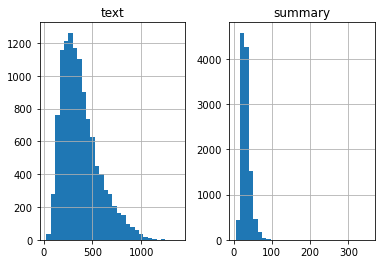

In [28]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in train['Clean article']:
      text_word_count.append(len(i.split()))

for i in train['Clean highlights(Summary)']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()

In [29]:
#Check how much % of summary have 0-80 words
cnt=0
for i in train['Clean highlights(Summary)']:
    if(len(i.split())<=80):
        cnt=cnt+1
print(cnt/len(train['Clean highlights(Summary)']))

0.9962576153176675


In [30]:
#Check how much % of summary have 0-100 words
cnt=0
for i in train['Clean article']:
    if(len(i.split())<=80):
        cnt=cnt+1
print(cnt/len(train['Clean article']))

0.004177545691906005


In [31]:
#Model to summarize the text between 0-80 words for Summary and 0-900 words for Text
max_text_len=80
max_summary_len=80

Adding tokens at the beginning and the end of summary

For autoregressive sequence-to-sequence models, the special tokens are crucial. The beginning-of-sentence token serves as an instruction to the decoder to start decoding (it needs a very first state to predict what the next first token is). The end-of-sentence token is an instruction for the decoding algorithm to stop generating more tokens.

In [32]:
train['Clean highlights(Summary)'] = train['Clean highlights(Summary)'].apply(lambda x : 'sostok '+ x + ' eostok')

In [33]:
for i in range(5):
    print("Review:",train['Clean article'][i])
    print("\n")
    print("Summary:",train['Clean highlights(Summary)'][i])
    print("\n")

Review: cnn palestinian authority officially became rd member international criminal court wednesday step gives court jurisdiction alleged crimes palestinian territories formal accession marked ceremony hague netherlands court based palestinians signed icc founding rome statute january also accepted jurisdiction alleged crimes committed occupied palestinian territory including east jerusalem since june later month icc opened preliminary examination situation palestinian territories paving way possible war crimes investigations israelis members court palestinians may subject counter charges well israel united states neither icc member opposed palestinians efforts join body palestinian foreign minister riad al malki speaking wednesday ceremony said move toward greater justice palestine formally becomes state party rome statute today world also step closer ending long era impunity injustice said according icc news release indeed today brings us closer shared goals justice peace judge kuni

Spliting data Set into test and train data test

In [34]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(train['Clean article'],train['Clean highlights(Summary)'],test_size=0.33, random_state=42)


In [35]:
print('x_training_data',x_training_data)
print('x_test_data',x_test_data)
print('y_training_data',y_training_data)
print('y_test_data',y_test_data)

x_training_data 5288     sexual assault charges dropped uber driver max...
7089     year old first presenter bbc dance contest nom...
100      cnn anthony ray hinton thankful free nearly ye...
2608     inter milan set turn lucas leiva alex song pur...
9491     florida mailman caused major security scare la...
                               ...                        
11284    nearly bags depressant drug kava seized vehicl...
5191     delmarva power says cut power family eight die...
5390     benefits welfare schemes often blamed making p...
860      cnn marriage apocalypse may coming talk millen...
7270     meant ultimate symbol menace carving forehead ...
Name: Clean article, Length: 7698, dtype: object
x_test_data 1516     augusta way say azaleas full bloom said englan...
1393     special treatment lewis ferguson paul nicholls...
10560    emergency crews received call saying someone k...
11457    loving boyfriend granted girlfriend birthday w...
647      cnn sunday announcement corin

In [36]:
text_word_count=[]
tokenize=[word_tokenize(i) for i in x_training_data]
tokenize
for i in x_training_data:
      text_word_count.append(len(i.split()))
text_word_count

[264,
 321,
 302,
 211,
 981,
 192,
 430,
 341,
 295,
 434,
 265,
 471,
 448,
 586,
 285,
 413,
 693,
 570,
 377,
 673,
 157,
 210,
 455,
 238,
 176,
 644,
 189,
 348,
 477,
 152,
 389,
 300,
 292,
 307,
 412,
 157,
 419,
 386,
 177,
 298,
 722,
 308,
 508,
 693,
 721,
 319,
 476,
 608,
 283,
 282,
 301,
 576,
 857,
 188,
 571,
 282,
 256,
 175,
 462,
 267,
 317,
 170,
 503,
 512,
 703,
 247,
 901,
 308,
 185,
 412,
 176,
 567,
 263,
 156,
 280,
 439,
 303,
 163,
 566,
 216,
 268,
 267,
 196,
 407,
 199,
 726,
 300,
 102,
 386,
 234,
 629,
 559,
 694,
 348,
 393,
 189,
 332,
 325,
 185,
 161,
 227,
 309,
 216,
 311,
 355,
 593,
 210,
 470,
 592,
 241,
 411,
 524,
 309,
 474,
 222,
 165,
 711,
 442,
 236,
 1066,
 788,
 435,
 555,
 371,
 334,
 595,
 142,
 133,
 136,
 181,
 319,
 503,
 338,
 490,
 338,
 362,
 391,
 268,
 500,
 491,
 729,
 202,
 292,
 237,
 346,
 202,
 239,
 373,
 431,
 505,
 489,
 482,
 204,
 108,
 522,
 229,
 555,
 731,
 403,
 700,
 684,
 244,
 272,
 328,
 160,
 327,
 42

In [37]:
#Lets tokenize the text to get the vocab count , you can use Spacy here also

from keras.preprocessing.text import Tokenizer 
from keras_preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_training_data))

In [38]:
tokenizer = Tokenizer()
def get_sequence_of_tokens(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    
    ## convert data to sequence of tokens 
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

inp_sequences, total_words = get_sequence_of_tokens(tokenize)
inp_sequences[:10]

[[625, 946],
 [625, 946, 411],
 [625, 946, 411, 1082],
 [625, 946, 411, 1082, 5183],
 [625, 946, 411, 1082, 5183, 636],
 [625, 946, 411, 1082, 5183, 636, 18610],
 [625, 946, 411, 1082, 5183, 636, 18610, 15755],
 [625, 946, 411, 1082, 5183, 636, 18610, 15755, 1810],
 [625, 946, 411, 1082, 5183, 636, 18610, 15755, 1810, 7271],
 [625, 946, 411, 1082, 5183, 636, 18610, 15755, 1810, 7271, 3386]]

In [39]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 60.96190050519416
Total Coverage of rare words: 3.127358697503274


In [40]:
#x_training_data, x_test_data, y_training_data, y_test_data 
#x_tr,x_val,y_tr,y_val
#prepare a tokenizer for summaries on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_training_data))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_training_data) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_test_data) 

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq, maxlen=max_summary_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
x_voc  =   x_tokenizer.num_words +1

In [41]:
x_voc

28824

prepare a tokenizer for summaries on training data

In [42]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_training_data))

In [43]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 76.08844641633301
Total Coverage of rare words: 14.838682503580152


defining tokenizer with most common words for summaries

In [44]:
#x_training_data, x_test_data, y_training_data, y_test_data 
#x_tr,x_val,y_tr,y_val
#prepare a tokenizer for summaries on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_training_data))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_training_data) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_test_data) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1

In [45]:
y_voc

6630

checking word count of start token is equal to length of the training data

In [46]:
y_tokenizer.word_counts['sostok'],len(y_tr)

(7698, 7698)

In [47]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [48]:
print(y_tr)
print(x_tr)

[[   1   80  737 ...    0    0    0]
 [   1    9  322 ...    0    0    0]
 [   1 1547 1954 ...    0    0    0]
 ...
 [   1  956 2692 ...    0    0    0]
 [   1 5159 5004 ...    0    0    0]
 [   1 4819  361 ...    0    0    0]]
[[    8    45   115 ...  1311  7751  3189]
 [23093     3 26558 ...    74  2212 21742]
 [  561   570 15756 ...   668  7845     1]
 ...
 [ 8143   220    66 ...    66  4402  1415]
 [  239   700  5135 ...     4   239    79]
 [    9   111   306 ...   408  4489 10331]]


In [49]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

Model building, defining LSTM layers, Encoder and Decoder

In [50]:
"""max_text_len=900
max_summary_len=80"""
from keras import backend as K
import tensorflow 
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#from attention_keras.src.layers.attention import AttentionLayer
from keras import layers
from tensorflow.keras.layers import Attention
from tensorflow import keras
from attention import Attention
from keras import layers
#from attention import AttentionLayer
K.clear_session()



In [51]:
encoder_inputs = Input(shape=(max_text_len, ))
latent_dim = 300
embedding_dim=100
# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim,
                    trainable=True)(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output1, state_h1, state_c1) = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output2, state_h2, state_c2) = encoder_lstm2(encoder_output1)

# Encoder LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_state=True,
                     return_sequences=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_outputs, state_h, state_c) = encoder_lstm3(encoder_output2)

# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True,
                    return_state=True, dropout=0.4,
                    recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state, decoder_back_state) = \
    decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 80, 100)      2882400     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 80, 300),    481200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

Training the Model

In [52]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')


monitoring the validation loss

In [53]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [54]:
es = [EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2), 
      ModelCheckpoint('./MyModel_tf',monitor='val_loss', verbose=1,
                      save_best_only=True, mode='min', save_weights_only = False)]

In [ ]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=512, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50


In [ ]:
history